In [7]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

class Util:
        
    def report_classification(model, df_train, df_test, X_features, y_feature):
        
        classes_train = np.unique(df_train[y_feature].values).tolist()
        classes_test = np.unique(df_test[y_feature].values).tolist()
        
        assert (classes_train == classes_test)
        
        classes = classes_train # The order of class is important!
        
        X_train = df_train[X_features].values.tolist()
        X_test = df_test[X_features].values.tolist()
        
        y_train = df_train[y_feature].values.tolist()
        y_test = df_test[y_feature].values.tolist()
        
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        report_cm(y_train, y_test, y_train_pred, y_test_pred, classes)
        
    def report_cm(y_train, y_test, y_train_pred, y_test_pred, classes):
        figure, axes = plt.subplots(1, 2, figsize=(10,5))

        cm_test = confusion_matrix(y_test, y_test_pred)
        df_cm_test = pd.DataFrame(cm_test, index = classes, columns = classes)
        ax = sns.heatmap(df_cm_test, annot=True, ax = axes[0], square= True)
        ax.set_title('Test CM')

        cm_train = confusion_matrix(y_train, y_train_pred)
        df_cm_train = pd.DataFrame(cm_train, index = classes, columns = classes)
        ax = sns.heatmap(df_cm_train, annot=True, ax = axes[1], square= True)
        ax.set_title('Train CM')

        print('-' * 20 + 'Testing Performance' + '-' * 20)
        print(classification_report(y_test, y_test_pred, target_names = classes))
        print('acc: ', metrics.accuracy_score(y_test, y_test_pred))

        print('-' * 20 + 'Training Performance' + '-' * 20)
        print(classification_report(y_train, y_train_pred, target_names = classes))
        print('acc: ', metrics.accuracy_score(y_train, y_train_pred))

# Testing SparkContext

In [1]:
import pyspark
sc = pyspark.SparkContext('local[*]')

# do something to prove it works
rdd = sc.parallelize(range(1000))
rdd.takeSample(False, 5)

[472, 780, 510, 599, 708]

In [152]:
# # !cat /opt/conda/LICENSE.txt

# RDDread = sc.textFile ("/opt/conda/LICENSE.txt")
# RDDread.collect()
# RDDread.first()
# RDDread.sample(True, 0.33).collect()

# Generating Binary Classification Data using sklearn

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.datasets import make_gaussian_quantiles

X1, Y1 = make_classification(n_features=10,
                             n_redundant=0, 
                             n_informative=1,
                             n_clusters_per_class=1)

df = pd.DataFrame(X1, columns=['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9'])
df['label'] = Y1

In [6]:
df.head()

,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,label
0,-0.581891,0.064288,-0.276192,0.671815,1.092010,-0.656808,-0.773232,1.776485,0.927137,-0.424455,1
1,-2.132830,1.352996,-0.264884,0.427542,-1.145800,1.287350,0.115010,0.967241,-0.931218,0.524528,0
2,-0.566897,0.823943,-0.054130,-1.285589,1.033042,-1.972572,0.023378,-0.302108,-0.537940,-0.217850,1
3,0.926738,-0.286408,-0.552817,0.201282,-1.417041,0.321418,-0.601766,0.091164,0.479665,1.724932,0
4,-0.658663,-0.418822,0.416966,-1.487653,0.827320,0.549552,-0.185313,0.708085,-0.833843,0.612576,1


# Saving Data as a csv file to Create Spark Dataframe

In [9]:
df.to_csv('gen.csv', index=False)

In [51]:
# import csv
# rdd = sc.textFile("gen.csv")
# rdd = rdd.mapPartitions(lambda x: csv.reader(x))
# rdd.map(lambda x : float(x[0])).take(5)
# rdd.take(1)
# df = rdd.toDF(rdd.first())

# Creating a SparkSession

In [4]:
# https://spark.apache.org/docs/latest/sql-programming-guide.html#sql

from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("TestApp") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

# Loading csv file using SparkContext

In [5]:
df = spark.read.format('com.databricks.spark.csv').options(header='true', inferschema='true').load('gen.csv')

df.cache()
# Register the DataFrame as a SQL temporary view
df.createOrReplaceTempView("gen")

In [12]:
df.printSchema()

root
 |-- c0: double (nullable = true)
 |-- c1: double (nullable = true)
 |-- c2: double (nullable = true)
 |-- c3: double (nullable = true)
 |-- c4: double (nullable = true)
 |-- c5: double (nullable = true)
 |-- c6: double (nullable = true)
 |-- c7: double (nullable = true)
 |-- c8: double (nullable = true)
 |-- c9: double (nullable = true)
 |-- label: integer (nullable = true)



In [13]:
display(df.show(10))

+--------------------+--------------------+--------------------+-------------------+--------------------+-------------------+-------------------+--------------------+-------------------+--------------------+-----+
|                  c0|                  c1|                  c2|                 c3|                  c4|                 c5|                 c6|                  c7|                 c8|                  c9|label|
+--------------------+--------------------+--------------------+-------------------+--------------------+-------------------+-------------------+--------------------+-------------------+--------------------+-----+
| -0.5818906172019618| 0.06428818034683818| -0.2761923630683961| 0.6718147593887743|  1.0920095988722633|-0.6568081717744917| -0.773231768127305|  1.7764854943968649| 0.9271374696145964| -0.4244546552314705|    1|
| -2.1328297811774832|  1.3529960238222913|-0.26488382717008113| 0.4275415782422321| -1.1457996293525423| 1.2873501140005958|0.11501049749712955

None

In [176]:
display(df.columns)
display(df.dtypes)
df.sample(False, 0.3).count()

['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9', 'label']

[('c0', 'double'),
 ('c1', 'double'),
 ('c2', 'double'),
 ('c3', 'double'),
 ('c4', 'double'),
 ('c5', 'double'),
 ('c6', 'double'),
 ('c7', 'double'),
 ('c8', 'double'),
 ('c9', 'double'),
 ('label', 'int')]

29

# Run Simple SQL using SparkContext

In [6]:
# from pyspark.sql import SQLContext
# sqlContext = SQLContext(sc)
# sqlContext.sql("SELECT c1, label FROM gen") # or df.select([c1, label])

sqlDF = spark.sql("SELECT c1, label FROM gen") # or df.select([c1, label])
sqlDF.show(10)

c1 = list(map(lambda r : r['c1'], sqlDF.collect()))
label = list(map(lambda r : r['label'], sqlDF.collect()))
list(zip(c1, label))

+--------------------+-----+
|                  c1|label|
+--------------------+-----+
| 0.06428818034683818|    1|
|  1.3529960238222913|    0|
|  0.8239433756074305|    1|
|-0.28640791884465433|    0|
|-0.41882244233434707|    1|
| 0.46694035107555604|    0|
| -0.1333900423239349|    0|
|-0.22555212792472606|    1|
|  0.5051677662811811|    0|
|  0.8166794745011788|    1|
+--------------------+-----+
only showing top 10 rows



[(0.06428818034683818, 1),
 (1.3529960238222913, 0),
 (0.8239433756074305, 1),
 (-0.28640791884465433, 0),
 (-0.41882244233434707, 1),
 (0.46694035107555604, 0),
 (-0.1333900423239349, 0),
 (-0.22555212792472606, 1),
 (0.5051677662811811, 0),
 (0.8166794745011788, 1),
 (-0.13272954993281647, 0),
 (0.03153938761529191, 1),
 (-0.6866031297548427, 1),
 (1.0967836176497179, 0),
 (1.0054612530350273, 1),
 (1.3001850807334896, 0),
 (-0.6795394749289622, 0),
 (1.4097054742972168, 0),
 (-0.6659808992622139, 0),
 (0.5232745995878693, 1),
 (0.13039370231405742, 0),
 (-0.3442160867877221, 0),
 (-0.2058430589149328, 0),
 (1.8158952412146447, 1),
 (-0.46970924421213306, 0),
 (-0.8548799464679143, 1),
 (-1.1495712377429472, 1),
 (0.1058375828979097, 1),
 (0.5976307224713343, 1),
 (-1.7543729612604253, 1),
 (-1.5297508788661296, 1),
 (-1.1717775197847766, 0),
 (-0.7237153197266217, 1),
 (1.074461857166102, 1),
 (0.0086594192939135, 1),
 (-0.5892380768249048, 0),
 (-1.4560898793026924, 0),
 (1.1823939

# Projection

In [16]:
df.select("c1").show(10)
df.select(['label']).show(10)

+--------------------+
|                  c1|
+--------------------+
| 0.06428818034683818|
|  1.3529960238222913|
|  0.8239433756074305|
|-0.28640791884465433|
|-0.41882244233434707|
| 0.46694035107555604|
| -0.1333900423239349|
|-0.22555212792472606|
|  0.5051677662811811|
|  0.8166794745011788|
+--------------------+
only showing top 10 rows

+-----+
|label|
+-----+
|    1|
|    0|
|    1|
|    0|
|    1|
|    0|
|    0|
|    1|
|    0|
|    1|
+-----+
only showing top 10 rows



# Filtering

In [17]:
df.filter(df['c1'] > 0).select(['c1', 'c2']).show(10)

+-------------------+--------------------+
|                 c1|                  c2|
+-------------------+--------------------+
|0.06428818034683818| -0.2761923630683961|
| 1.3529960238222913|-0.26488382717008113|
| 0.8239433756074305|-0.05412970908830194|
|0.46694035107555604|  0.6301825369829871|
| 0.5051677662811811| 0.08108494521816095|
| 0.8166794745011788|   -0.44886581799793|
|0.03153938761529191|  0.9819524616870424|
| 1.0967836176497179|  1.5357818984553249|
| 1.0054612530350273| -1.1415938294150696|
| 1.3001850807334896|  -2.261616072256548|
+-------------------+--------------------+
only showing top 10 rows



# Spark Datafram to Pandas Dataframe

In [15]:
sqlDF.toPandas().head(10)

,c1,label
0,0.064288,1
1,1.352996,0
2,0.823943,1
3,-0.286408,0
4,-0.418822,1
5,0.466940,0
6,-0.133390,0
7,-0.225552,1
8,0.505168,0
9,0.816679,1


# Creating VectorAssembler

In [20]:
# https://spark.apache.org/docs/latest/api/python/pyspark.ml.html#pyspark.ml.feature.VectorAssembler
from pyspark.ml.feature import VectorAssembler

vecAssembler = VectorAssembler(inputCols=['c0', 'c1', 'c2', 
                                          'c3', 'c4', 'c5', 
                                          'c6', 'c7', 'c8', 'c9'], outputCol="va")

In [ ]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler

from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.tuning import CrossValidator,  TrainValidationSplit, ParamGridBuilder
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Splitting Data Into Train and Test

In [21]:
(df_train, df_test) = df.randomSplit([0.7, 0.3])

# Creating a Binary Classification MLlib Pipelines


https://docs.databricks.com/spark/latest/mllib/binary-classification-mllib-pipelines.html


# Creating PCA

In [19]:
from pyspark.ml.feature import PCA

pca = PCA(k=5, inputCol="va", outputCol="features")

# Creating a Random Forest Classifier

In [24]:
# # https://spark.apache.org/docs/latest/mllib-ensembles.html#random-forests
from pyspark.ml.classification import RandomForestClassifier

rf = RandomForestClassifier(labelCol="label", featuresCol="features")

# Creating a Multiclass Classification Evaluator

In [25]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

evaluator = MulticlassClassificationEvaluator() # + other params as in Scala    

# Creating  a Pipeline

In [26]:
from pyspark.ml import Pipeline

pipeline = Pipeline(stages=[vecAssembler, pca, rf])

# Creating Grid Search Configuration 

In [27]:
from pyspark.ml.tuning import CrossValidator, TrainValidationSplit, ParamGridBuilder

paramGrid = (ParamGridBuilder()
             .addGrid(rf.maxDepth, [2, 4, 6])
             .addGrid(rf.maxBins, [20, 60])
             .addGrid(rf.numTrees, [5, 20])
             .addGrid(rf.impurity, ['gini', 'entropy'])
             .build())

def get_validation(by='cv'):
    if by is 'cv':
        return CrossValidator(
            estimator=pipeline,
            estimatorParamMaps=paramGrid,
            evaluator=evaluator,
            numFolds=10)
    
    elif by is 'tvs':
        return TrainValidationSplit(
            estimator=pipeline,
            estimatorParamMaps=paramGrid,
            evaluator=evaluator,
            # 80% of the data will be used for training, 20% for validation.
            trainRatio=0.8)
    else:
        print('please, pick either cv or tvs')
        return None
    
def evaluate(model, df_train, df_test):
    train_pred = model.transform(df_train)
    train_acc = evaluator.evaluate(train_pred)
    
    test_pred = model.transform(df_test)
    test_acc = evaluator.evaluate(test_pred)
    
    print('train_acc: {}, test_acc: {}'.format(train_acc, test_acc))
    
    return train_pred, test_pred

# Pick the Best Model by Applying 10Fold CV - CrossValidator

In [28]:
val = get_validation('cv')
model_cv = val.fit(df_train)

In [43]:
bestModel = model_cv.bestModel
finalPredictions = bestModel.transform(df_train)
evaluator.evaluate(finalPredictions)

0.920389208314905

# Evalution of Model - Accuracy

In [35]:
train_pred, test_pred = evaluate(model_cv, df_train, df_test)

train_acc: 0.920389208314905, test_acc: 0.8333333333333333


# Evalution of Model - Precision - Recall

--------------------Testing Performance--------------------
             precision    recall  f1-score   support

          0       0.91      0.77      0.83        13
          1       0.77      0.91      0.83        11

avg / total       0.84      0.83      0.83        24

acc:  0.833333333333
--------------------Training Performance--------------------
             precision    recall  f1-score   support

          0       1.00      0.84      0.91        37
          1       0.87      1.00      0.93        39

avg / total       0.93      0.92      0.92        76

acc:  0.921052631579


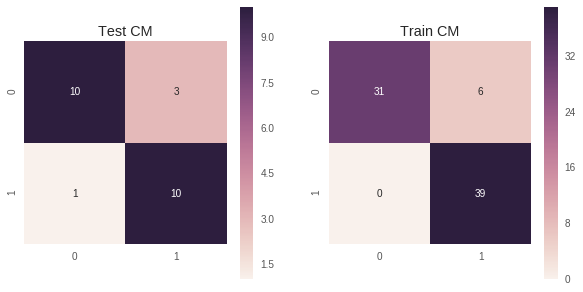

In [36]:
y_train = train_pred.select('label').toPandas().apply(lambda x : x[0], 1).values.tolist()
y_train_pred = train_pred.select('prediction').toPandas().apply(lambda x : x[0], 1).values.tolist()

y_test = test_pred.select('label').toPandas().apply(lambda x : x[0], 1).values.tolist()
y_train_test = test_pred.select('prediction').toPandas().apply(lambda x : x[0], 1).values.tolist()

Util.report_cm(y_train, y_test, y_train_pred, y_train_test, ['0', '1'])

In [37]:
selected = train_pred.select("label", "prediction", "probability")
display(selected.show(10))

+-----+----------+--------------------+
|label|prediction|         probability|
+-----+----------+--------------------+
|    0|       1.0|[0.39902805706866...|
|    1|       1.0|[0.39902805706866...|
|    1|       1.0|[0.14080554606657...|
|    0|       1.0|[0.25060901486788...|
|    0|       0.0|[0.78641481823619...|
|    1|       1.0|[0.12080554606657...|
|    1|       1.0|[0.36123926448710...|
|    1|       1.0|[0.21485143911031...|
|    1|       1.0|[0.30760431515810...|
|    1|       1.0|[0.41974234278295...|
+-----+----------+--------------------+
only showing top 10 rows



None

# Pick the Best Model by Applying - TrainValidationSplit

In [30]:
val = get_validation('tvs')
model_tsv = val.fit(df_train)

In [42]:
bestModel = model_tsv.bestModel
finalPredictions = bestModel.transform(df_train)
evaluator.evaluate(finalPredictions)

0.8802689339679313

# Evalution of Model - Accuracy

In [32]:
train_pred, test_pred = evaluate(model_tsv, df_train, df_test)

train_acc: 0.8802689339679313, test_acc: 0.7905643738977073


# Evalution of Model - Precision - Recall

--------------------Testing Performance--------------------
             precision    recall  f1-score   support

          0       0.79      0.85      0.81        13
          1       0.80      0.73      0.76        11

avg / total       0.79      0.79      0.79        24

acc:  0.791666666667
--------------------Training Performance--------------------
             precision    recall  f1-score   support

          0       0.97      0.78      0.87        37
          1       0.83      0.97      0.89        39

avg / total       0.89      0.88      0.88        76

acc:  0.881578947368


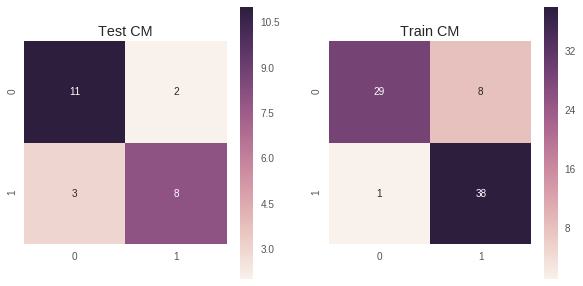

In [33]:
y_train = train_pred.select('label').toPandas().apply(lambda x : x[0], 1).values.tolist()
y_train_pred = train_pred.select('prediction').toPandas().apply(lambda x : x[0], 1).values.tolist()

y_test = test_pred.select('label').toPandas().apply(lambda x : x[0], 1).values.tolist()
y_train_test = test_pred.select('prediction').toPandas().apply(lambda x : x[0], 1).values.tolist()

Util.report_cm(y_train, y_test, y_train_pred, y_train_test, ['0', '1'])

In [34]:
selected = train_pred.select("label", "prediction", "probability")
display(selected.show(10))

+-----+----------+--------------------+
|label|prediction|         probability|
+-----+----------+--------------------+
|    0|       1.0|[0.10307163080521...|
|    1|       1.0|[0.24424810139344...|
|    1|       1.0|[0.10307163080521...|
|    0|       1.0|[0.24424810139344...|
|    0|       0.0|[0.77546218487394...|
|    1|       1.0|[0.24424810139344...|
|    1|       1.0|[0.47536231884057...|
|    1|       1.0|[0.24424810139344...|
|    1|       1.0|[0.24424810139344...|
|    1|       1.0|[0.24424810139344...|
+-----+----------+--------------------+
only showing top 10 rows



None